# Visualising Mode Share Evolution
This section demonstrates how to plot the mode share evolution from the Londinium scenario, comparing the initial and final iterations. The plot will help illustrate behavioural adaptation and mode choice change in MATSim.

# Mode Share Analysis Including All Modes
This section calculates and visualises mode shares for all available modes (including car) using the raw legs output file. This ensures no mode is omitted from the analysis.

In [7]:
import pandas as pd

# Inspect columns in the legs file to find the correct mode column
legs_file = r'C:/Users/gy21jw/Coding/londinium/outputs/ITERS/it.99/99.legs.csv.gz'
df_legs = pd.read_csv(legs_file)
print(df_legs.columns)


Index(['person;trip_id;dep_time;trav_time;wait_time;distance;mode;network_mode;start_link;start_x;start_y;end_link;end_x;end_y;access_stop_id;egress_stop_id;transit_line;transit_route;vehicle_id'], dtype='object')


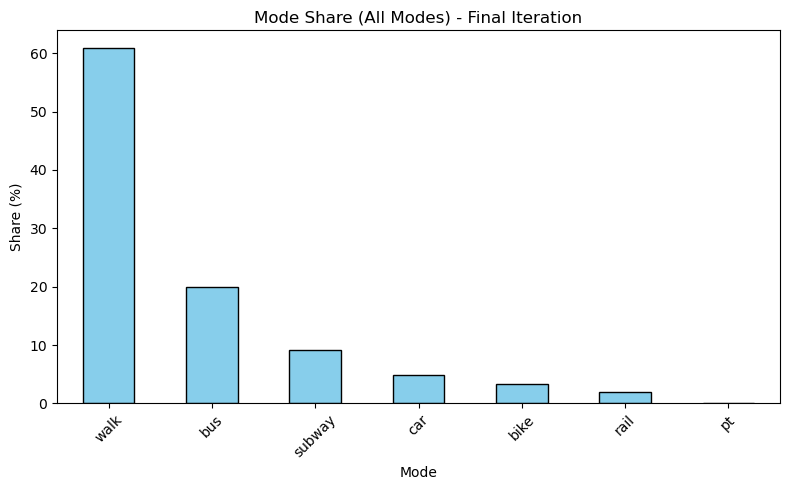

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Define column names
columns = ['person', 'trip_id', 'dep_time', 'trav_time', 'wait_time', 'distance', 'mode', 'network_mode', 'start_link', 'start_x', 'start_y', 'end_link', 'end_x', 'end_y', 'access_stop_id', 'egress_stop_id', 'transit_line', 'transit_route', 'vehicle_id']

# Load the legs file with correct parsing
legs_file = r'C:/Users/gy21jw/Coding/londinium/outputs/ITERS/it.99/99.legs.csv.gz'
df_legs = pd.read_csv(legs_file, sep=';', names=columns, header=0)

# Calculate mode share for all modes
mode_counts = df_legs['mode'].value_counts().sort_values(ascending=False)
mode_share = (mode_counts / mode_counts.sum()) * 100

# Plot mode share for all modes
plt.figure(figsize=(8,5))
mode_share.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mode Share (All Modes) - Final Iteration')
plt.ylabel('Share (%)')
plt.xlabel('Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


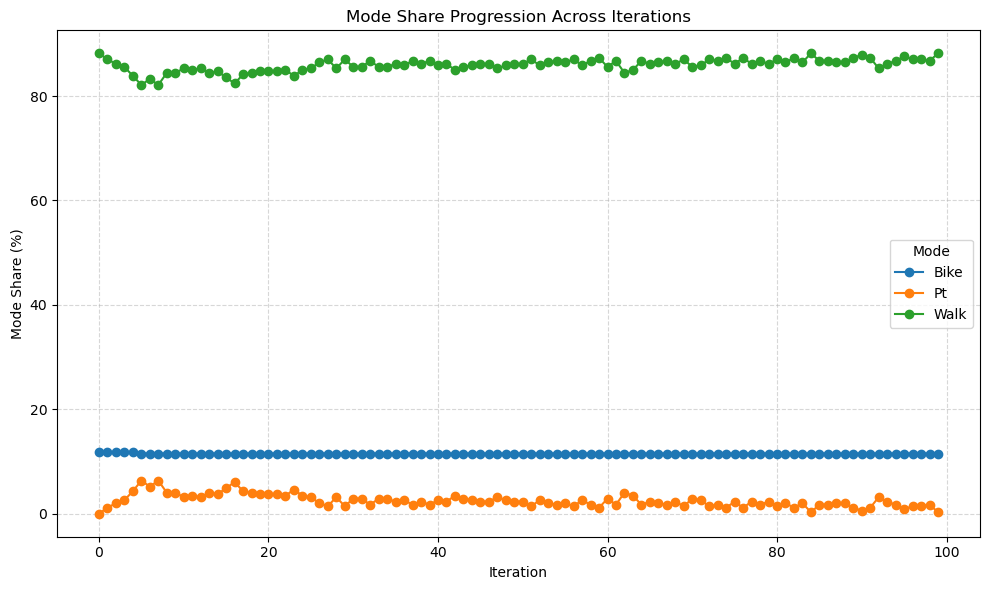

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load mode share summary for all iterations
modestats_file = r'C:/Users/gy21jw/Coding/londinium/outputs/modestats.csv'
df_mode = pd.read_csv(modestats_file, sep=';')

plt.figure(figsize=(10,6))
for col in df_mode.columns:
    if col != 'iteration':
        plt.plot(df_mode['iteration'], df_mode[col]*100, marker='o', label=col.capitalize())
plt.title('Mode Share Progression Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mode Share (%)')
plt.legend(title='Mode')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


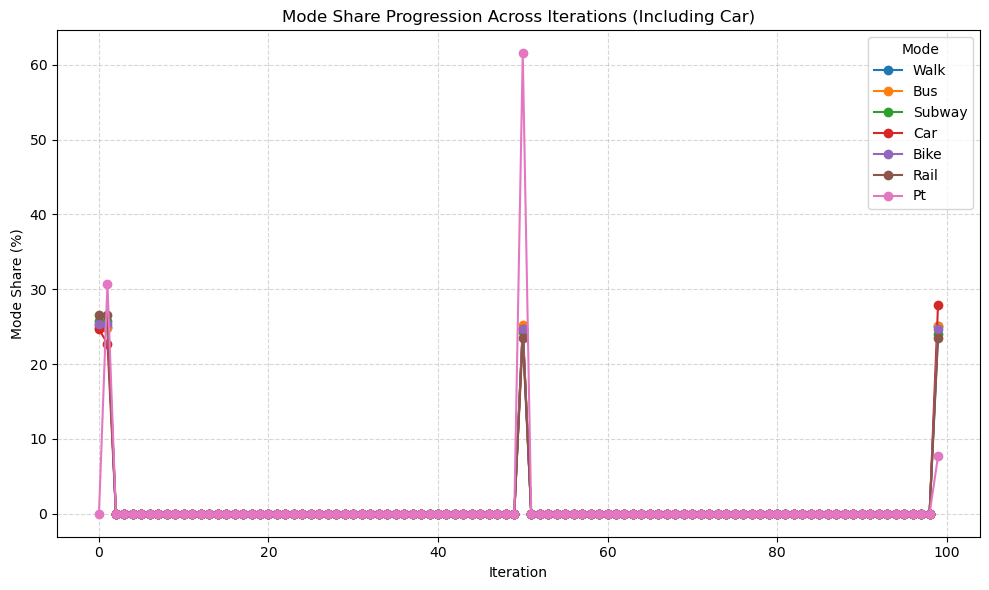

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os
glob_path = r'C:/Users/gy21jw/Coding/londinium/outputs/ITERS/'

iterations = range(0, 100)
mode_progression = {}

for i in iterations:
    legs_file = os.path.join(glob_path, f'it.{i}/{i}.legs.csv.gz')
    if not os.path.exists(legs_file):
        continue
    df_legs = pd.read_csv(legs_file, sep=';', names=[
        'person', 'trip_id', 'dep_time', 'trav_time', 'wait_time', 'distance', 'mode', 'network_mode', 'start_link', 'start_x', 'start_y', 'end_link', 'end_x', 'end_y', 'access_stop_id', 'egress_stop_id', 'transit_line', 'transit_route', 'vehicle_id'
    ], header=0)
    mode_counts = df_legs['mode'].value_counts()
    for mode in mode_counts.index:
        if mode not in mode_progression:
            mode_progression[mode] = [0]*100
        mode_progression[mode][i] = mode_counts[mode]
    # Fill missing modes for this iteration with 0
    for mode in mode_progression:
        if len(mode_progression[mode]) < i+1:
            mode_progression[mode][i] = 0

# Convert to DataFrame and calculate shares
df_modes = pd.DataFrame(mode_progression)
df_modes = df_modes.fillna(0)
df_modes['iteration'] = iterations
for mode in mode_progression:
    total = df_modes[mode].sum()
    if total == 0:
        continue
    df_modes[mode] = df_modes[mode] / df_modes[mode].sum() * 100

plt.figure(figsize=(10,6))
for mode in mode_progression:
    plt.plot(df_modes['iteration'], df_modes[mode], marker='o', label=mode.capitalize())
plt.title('Mode Share Progression Across Iterations (Including Car)')
plt.xlabel('Iteration')
plt.ylabel('Mode Share (%)')
plt.legend(title='Mode')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


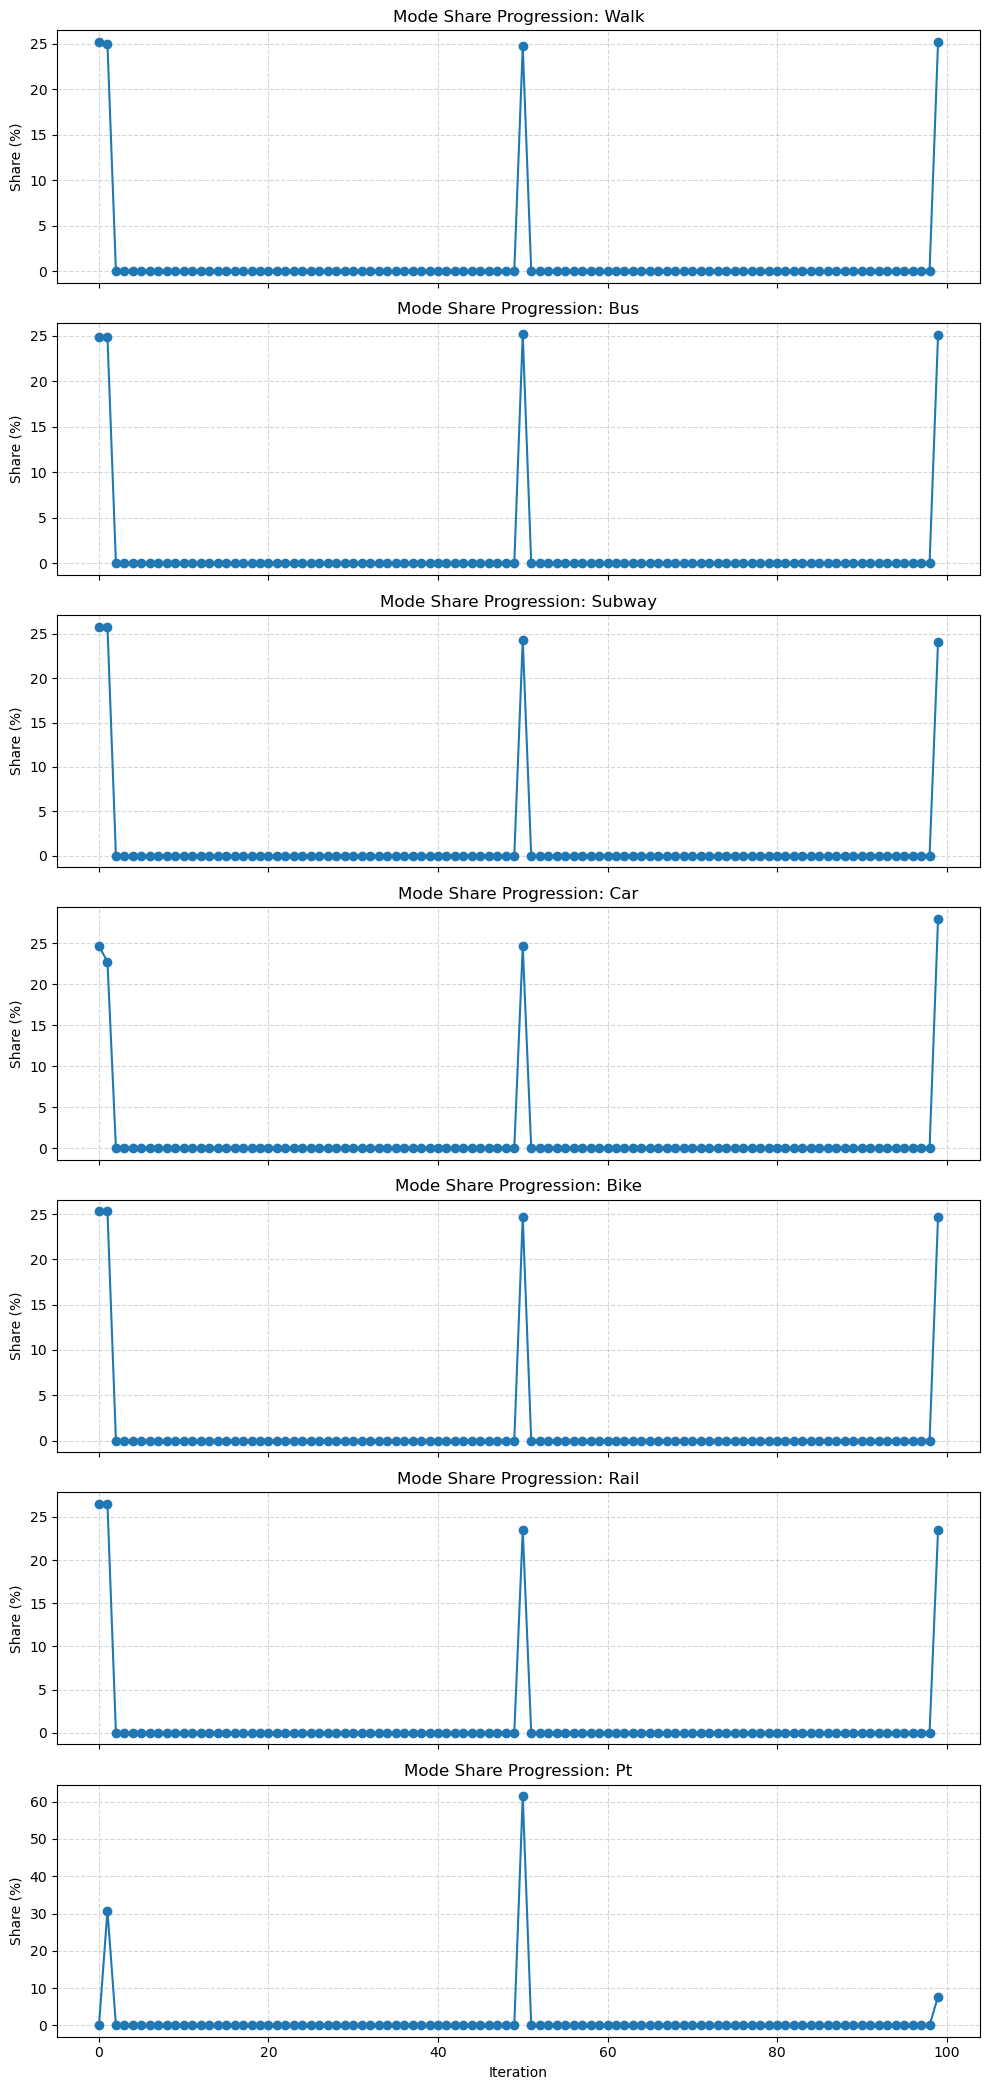

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Prepare the mode progression data as before
iterations = range(0, 100)
glob_path = r'C:/Users/gy21jw/Coding/londinium/outputs/ITERS/'
mode_progression = {}
for i in iterations:
    legs_file = os.path.join(glob_path, f'it.{i}/{i}.legs.csv.gz')
    if not os.path.exists(legs_file):
        continue
    df_legs = pd.read_csv(legs_file, sep=';', names=[
        'person', 'trip_id', 'dep_time', 'trav_time', 'wait_time', 'distance', 'mode', 'network_mode', 'start_link', 'start_x', 'start_y', 'end_link', 'end_x', 'end_y', 'access_stop_id', 'egress_stop_id', 'transit_line', 'transit_route', 'vehicle_id'
    ], header=0)
    mode_counts = df_legs['mode'].value_counts()
    for mode in mode_counts.index:
        if mode not in mode_progression:
            mode_progression[mode] = [0]*100
        mode_progression[mode][i] = mode_counts[mode]
    for mode in mode_progression:
        if len(mode_progression[mode]) < i+1:
            mode_progression[mode][i] = 0

# Convert to DataFrame and calculate shares
df_modes = pd.DataFrame(mode_progression)
df_modes = df_modes.fillna(0)
df_modes['iteration'] = iterations
for mode in mode_progression:
    total = df_modes[mode].sum()
    if total == 0:
        continue
    df_modes[mode] = df_modes[mode] / df_modes[mode].sum() * 100

# Facet plot: one subplot per mode
modes = [m for m in mode_progression.keys() if m != 'iteration']
n_modes = len(modes)
fig, axes = plt.subplots(n_modes, 1, figsize=(10, 3*n_modes), sharex=True)
if n_modes == 1:
    axes = [axes]
for ax, mode in zip(axes, modes):
    ax.plot(df_modes['iteration'], df_modes[mode], marker='o', color='tab:blue')
    ax.set_title(f'Mode Share Progression: {mode.capitalize()}')
    ax.set_ylabel('Share (%)')
    ax.grid(True, linestyle='--', alpha=0.5)
axes[-1].set_xlabel('Iteration')
plt.tight_layout()
plt.show()


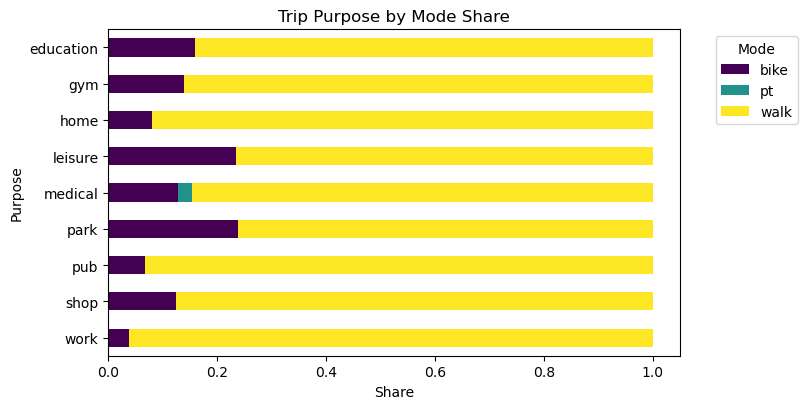

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the mode share per purpose data
csv_path = r"C:\Users\gy21jw\Coding\londinium\outputs\analysis\population\mode_share_per_purpose.csv"
df = pd.read_csv(csv_path)

# Pivot for stacked bar plot and order index alphabetically
pivot = df.pivot(index='purpose', columns='main_mode', values='share').fillna(0)
pivot = pivot.sort_index(ascending=False)

# Plot with reduced width and swapped axes
ax = pivot.plot(kind='barh', stacked=True, colormap='viridis', figsize=(7,4.2))
plt.xlabel('Share')
plt.ylabel('Purpose')
plt.title('Trip Purpose by Mode Share')
plt.tight_layout()
plt.legend(title='Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()